In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.naive_bayes import GaussianNB, MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [2]:
csv = pd.read_csv('lfd_2023_group2test.csv')
csv.info()
# 有空的格子全在第一格，可能是設計的
#缺失的資料正好在5%以內，可以直接drop掉(249, 超靠邀)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   grams       4751 non-null   float64
 1   width_cm    5000 non-null   int64  
 2   length_cm   5000 non-null   int64  
 3   wavelength  5000 non-null   int64  
 4   country     5000 non-null   object 
 5   cost        5000 non-null   int64  
 6   recoil      5000 non-null   float64
 7   y_offset    5000 non-null   float64
 8   shape       5000 non-null   object 
 9   distance    5000 non-null   float64
 10  target      5000 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 429.8+ KB


In [3]:
csv2 = csv.dropna()
csv3 = csv2.drop_duplicates()
csv3.info()
csvd = csv3

<class 'pandas.core.frame.DataFrame'>
Index: 4751 entries, 0 to 4999
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   grams       4751 non-null   float64
 1   width_cm    4751 non-null   int64  
 2   length_cm   4751 non-null   int64  
 3   wavelength  4751 non-null   int64  
 4   country     4751 non-null   object 
 5   cost        4751 non-null   int64  
 6   recoil      4751 non-null   float64
 7   y_offset    4751 non-null   float64
 8   shape       4751 non-null   object 
 9   distance    4751 non-null   float64
 10  target      4751 non-null   object 
dtypes: float64(4), int64(4), object(3)
memory usage: 445.4+ KB


In [4]:
v = csv3['target'].value_counts()
v

target
widget4    535
widget3    533
widget1    531
widget2    531
widget8    529
widget7    524
widget9    524
widget6    524
widget5    520
Name: count, dtype: int64

In [5]:
csvX = csv3.drop('target',axis=1)
csvy = csv3['target']
csvX.to_csv('csvX.csv', index=False)
csvy.to_csv('csvy.csv', index=False)

In [6]:
# Process non-numeric data using OneHotEncoder
encoder = OneHotEncoder(sparse=False)

# Select categorical columns
categorical_columns = csvX.select_dtypes(include=['object']).columns

# Apply OneHotEncoder
encoded_data = encoder.fit_transform(csvX[categorical_columns])

# Create a DataFrame with encoded data
encoded_csv = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

# Reset index if necessary to align the data
encoded_csv.reset_index(drop=True, inplace=True)
csvX.reset_index(drop=True, inplace=True)

# Drop original categorical columns
csv4 = csvX.drop(categorical_columns, axis=1)

# Merge the new encoded columns with the original DataFrame
csv4 = pd.concat([csv4, encoded_csv], axis=1)

# Check for duplicate columns and handle if any
duplicate_columns = csv4.columns[csv4.columns.duplicated()]
if duplicate_columns.any():
    csv4 = csv4.drop_duplicates()# Handle duplicate columns (e.g., by renaming or dropping)
    pass

# Check the final DataFrame
csv4.info()
csv4.to_csv('csv4.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4751 entries, 0 to 4750
Data columns (total 24 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   grams                   4751 non-null   float64
 1   width_cm                4751 non-null   int64  
 2   length_cm               4751 non-null   int64  
 3   wavelength              4751 non-null   int64  
 4   cost                    4751 non-null   int64  
 5   recoil                  4751 non-null   float64
 6   y_offset                4751 non-null   float64
 7   distance                4751 non-null   float64
 8   country_Belgium         4751 non-null   float64
 9   country_China           4751 non-null   float64
 10  country_France          4751 non-null   float64
 11  country_Germany         4751 non-null   float64
 12  country_India           4751 non-null   float64
 13  country_Italy           4751 non-null   float64
 14  country_Japan           4751 non-null   

C:\Users\USER\anaconda3\Lib\site-packages\sklearn\preprocessing\_encoders.py:972: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


#處理非數值的數據   #from GPT

encoder = OneHotEncoder(sparse=False)

categorical_columns = csv3.select_dtypes(include=['object']).columns
encoded_data = encoder.fit_transform(csv3[categorical_columns])
encoded_csv = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(categorical_columns))

csv4 = csv3.drop(categorical_columns, axis=1)
csv4 = pd.concat([csv4, encoded_csv], axis=1)

#for column in csvX.select_dtypes(include=['object']).columns:
#    csvX[column] = encoder.fit_transform(csvX[column])
csv4.info()

X = csv4                     #csv3.drop('target',axis=1)
y = csvy                     #csv3['target']
X.to_csv('X.csv', index=False)
y.to_csv('y.csv', index=False)

widget7
widget1
widget5
widget9
widget4
widget6
widget2
widget8
widget3


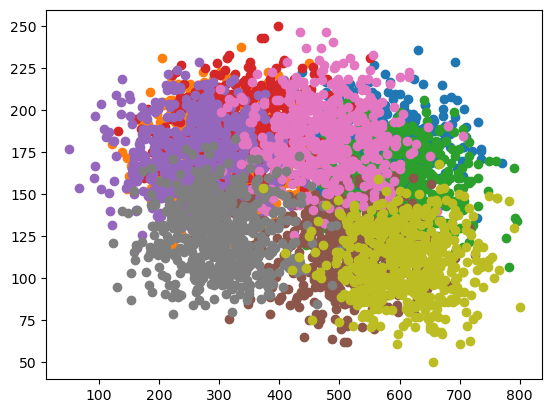

In [25]:
feature1 = 'grams'
feature2 = 'width_cm'

target = csvd['target'].unique()
#colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

for name in target:
    print(name)
    plt.scatter(csvd[csvd['target'] == name][feature1], csvd[csvd['target'] == name][feature2]) #, c=colors[name])

plt.show()

widget7
widget1
widget5
widget9
widget4
widget6
widget2
widget8
widget3


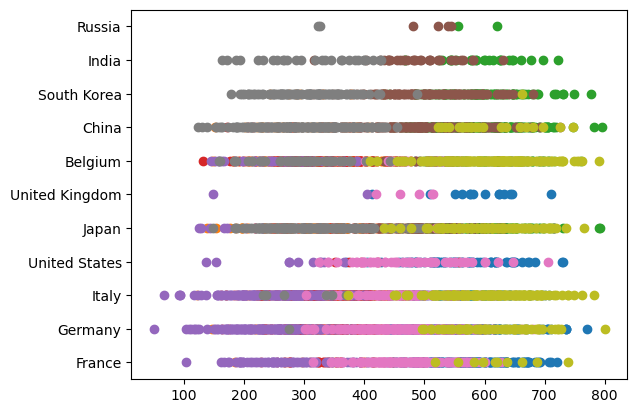

In [26]:
feature1 = 'grams'
feature2 = 'country'

target = csvd['target'].unique()
#colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

for name in target:
    print(name)
    plt.scatter(csvd[csvd['target'] == name][feature1], csvd[csvd['target'] == name][feature2]) #, c=colors[name])

plt.show()

widget7
widget1
widget5
widget9
widget4
widget6
widget2
widget8
widget3


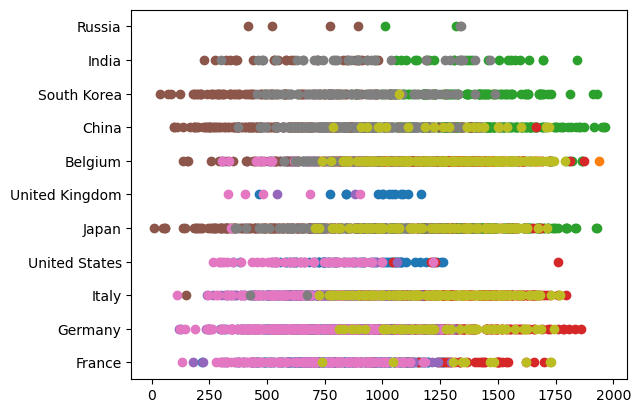

In [27]:
feature1 = 'cost'
feature2 = 'country'

target = csvd['target'].unique()
#colors = {'setosa': 'red', 'versicolor': 'green', 'virginica': 'blue'}

for name in target:
    print(name)
    plt.scatter(csvd[csvd['target'] == name][feature1], csvd[csvd['target'] == name][feature2]) #, c=colors[name])

plt.show()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(csv4, csvy, test_size=0.2, random_state=40)

In [12]:
#特徵縮放，使具有單位方差 GPT
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.transform(X_test)

朴素貝葉斯是一種基於貝葉斯定理的簡單但有效的概率分類方法。它在給定的特徵集合中，假設所有特徵彼此獨立。

貝葉斯定理：此定理描述了兩個條件概率之間的關係，即
P(A∣B)= P(B∣A)P(A) / P(B)
 。在朴素貝葉斯中，A表示類別，B表示特徵。
 
特徵獨立性假設：朴素貝葉斯的「朴素」之處在於它假設每個特徵在給定類別的條件下都是獨立的。這使得計算變得更簡單，但也可能限制模型在特徵相關時的準確性。

In [29]:
#naive bayes
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [30]:
pred_tr = model.predict(X_train)
pred_te = model.predict(X_test)

accuracytr = accuracy_score(y_train, pred_tr)
accuracy = accuracy_score(y_test, pred_te)
#accuracy
print("Accuracy on training data: ", accuracytr)
print("Accuracy on test data: ", accuracy)

Accuracy on training data:  0.9473684210526315
Accuracy on test data:  0.9337539432176656


In [31]:
scores = cross_val_score(model, csv4, csvy, cv=10)
scores

array([0.94117647, 0.94105263, 0.94736842, 0.94315789, 0.96      ,
       0.95578947, 0.94736842, 0.94105263, 0.92421053, 0.94315789])

In [32]:
scores.mean()

0.9444334365325077

In [33]:
scores.std()

0.009133418686634621

In [34]:
#GPT
report = classification_report(y_test, pred_te)
report

'              precision    recall  f1-score   support\n\n     widget1       0.90      0.91      0.91        94\n     widget2       0.93      0.91      0.92       101\n     widget3       0.93      0.94      0.93        94\n     widget4       0.95      0.96      0.95       109\n     widget5       0.93      0.94      0.94       108\n     widget6       0.96      0.93      0.94       119\n     widget7       0.87      0.92      0.89       111\n     widget8       0.97      0.97      0.97       118\n     widget9       0.99      0.90      0.94        97\n\n    accuracy                           0.93       951\n   macro avg       0.93      0.93      0.93       951\nweighted avg       0.93      0.93      0.93       951\n'

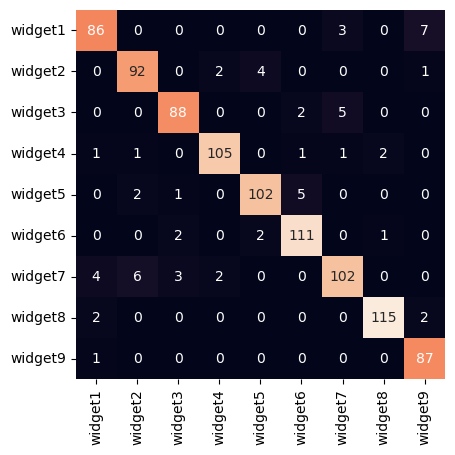

In [35]:
mat = confusion_matrix(y_test, pred_te)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
           xticklabels=model.classes_, yticklabels=model.classes_)
plt.show()

------------------------------------------------------------------------
隨機森林是一種集成學習方法，它結合了多個決策樹以提高預測的準確性和穩定性。

決策樹：隨機森林中的每個樹都是一個決策樹，它通過劃分特徵空間來做出預測。

集成學習：隨機森林將多個決策樹的預測結果進行結合（例如，透過投票），以提高整體模型的性能和穩定性。

特徵和數據的隨機選擇：為了提高樹之間的多樣性，隨機森林在構建每棵樹時會隨機選擇特徵和數據樣本。

減少過擬合：相較於單個決策樹，隨機森林通常能更好地泛化，減少過擬合問題。

In [36]:
# random forest?
rf = {
    'n_estimators': 100,
    'max_depth': None,
    'min_samples_split': 2,
    'min_samples_leaf': 1,
    'bootstrap': True,
    'random_state': 40
}

model2 = RandomForestClassifier(**rf)
model2.fit(X_train, y_train)

pred2 = model2.predict(X_test)


In [37]:
accu2 = accuracy_score(y_test, pred2)
accu2

0.9800210304942166

In [38]:
rf_report = classification_report(y_test, pred2)
rf_report

'              precision    recall  f1-score   support\n\n     widget1       0.97      1.00      0.98        94\n     widget2       0.99      0.96      0.97       101\n     widget3       0.98      0.98      0.98        94\n     widget4       0.97      0.99      0.98       109\n     widget5       0.99      0.99      0.99       108\n     widget6       0.97      0.97      0.97       119\n     widget7       0.97      0.95      0.96       111\n     widget8       0.99      0.99      0.99       118\n     widget9       0.99      0.99      0.99        97\n\n    accuracy                           0.98       951\n   macro avg       0.98      0.98      0.98       951\nweighted avg       0.98      0.98      0.98       951\n'

----------------------------------------------------------------------
支持向量機是一種強大的監督學習方法，用於分類和迴歸分析。它通過找到能最大化類別之間邊界的超平面來進行分類。

最大邊界分類器：SVM的核心思想是找到一個決策邊界（超平面），使得不同類別之間的邊界最大化。

支持向量：支持向量是距離決策邊界最近的數據點，這些點對於定義決策邊界至關重要。

核技巧：SVM可以通過核技巧將數據映射到更高維度空間中，以解決非線性可分的問提

In [39]:
#support venctor machine
svc = {
    'C': 1.0,          #C越大越嘗試最大限度正確分類訓練數據
    'kernel':'linear',   #如何將數據點映射到更高維度。rbf用於非線性問題常用
    #'gamma': 'scale'   #for rbf poly sigmoid核，定義單個訓練樣本影響的範圍
}
#scale代表自動從特徵的標準差算出來

model3 = SVC(**svc)
model3.fit(X_train, y_train)

pred3 = model3.predict(X_test)

In [42]:
accu3 = accuracy_score(y_test, pred3)
accu3

0.9758149316508938

In [49]:
svc_report = classification_report(y_test, pred3)
svc_report

'              precision    recall  f1-score   support\n\n           0       0.97      0.99      0.98        94\n           1       0.95      0.96      0.96       101\n           2       0.96      0.96      0.96        94\n           3       0.96      0.99      0.98       109\n           4       0.96      0.96      0.96       108\n           5       0.97      0.95      0.96       119\n           6       0.96      0.94      0.95       111\n           7       0.97      0.97      0.97       118\n           8       1.00      0.99      0.99        97\n\n    accuracy                           0.97       951\n   macro avg       0.97      0.97      0.97       951\nweighted avg       0.97      0.97      0.97       951\n'

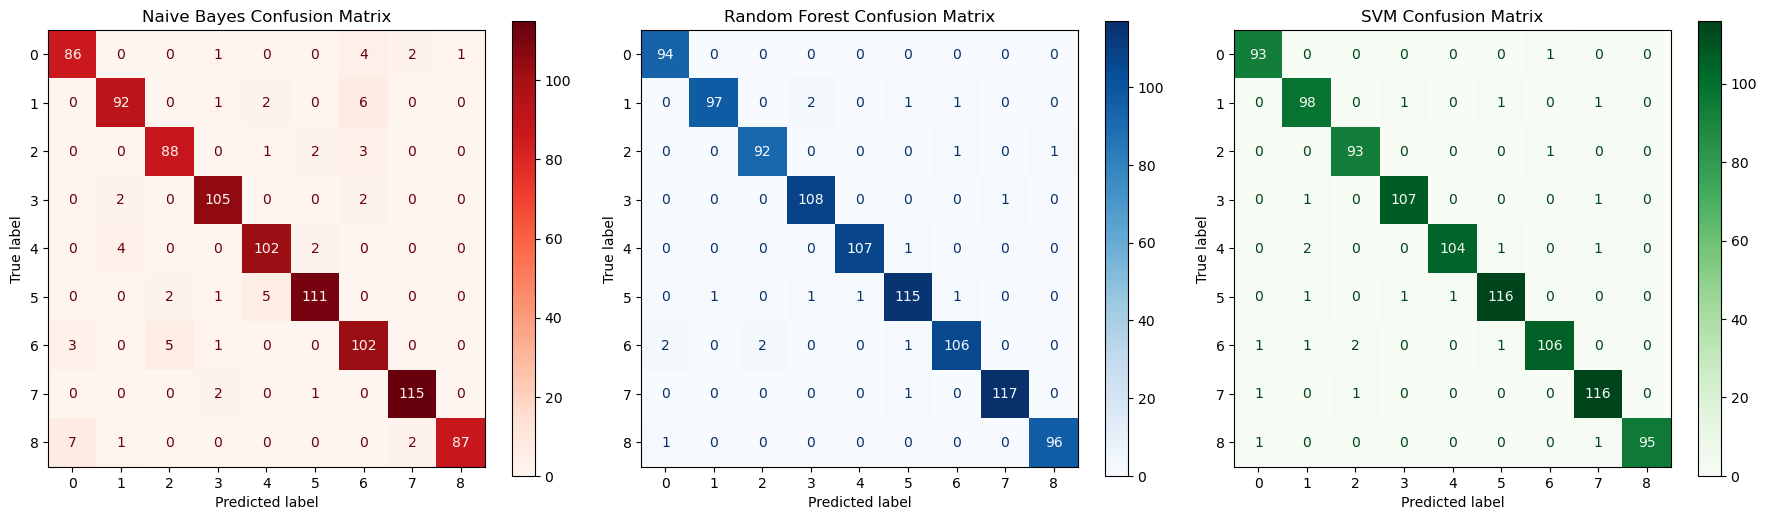

In [43]:
label_encoder = LabelEncoder()

cm1 = confusion_matrix(y_test, pred_te)
cm2 = confusion_matrix(y_test, pred2)
cm3 = confusion_matrix(y_test, pred3)

fig, ax = plt.subplots(1, 3, figsize=(18, 5))
ax[0].set_title('Naive Bayes Confusion Matrix')
ax[1].set_title('Random Forest Confusion Matrix')
ax[2].set_title('SVM Confusion Matrix')

#sns.heatmap(cm1.T, square=True, annot=True, fmt='d', cbar=False,
#           xticklabels=model.classes_, yticklabels=model.classes_)
#sns.heatmap(cm2.T, square=True, annot=True, fmt='d', cbar=False,
#           xticklabels=model2.classes_, yticklabels=model2.classes_)
#sns.heatmap(cm3.T, square=True, annot=True, fmt='d', cbar=False,
#           xticklabels=model3.classes_, yticklabels=model3.classes_)

ConfusionMatrixDisplay(cm1, ).plot(values_format='d', cmap='Reds', ax=ax[0])
ConfusionMatrixDisplay(cm2, ).plot(values_format='d', cmap='Blues', ax=ax[1])
ConfusionMatrixDisplay(cm3, ).plot(values_format='d', cmap='Greens', ax=ax[2])


plt.tight_layout()
#plt.show()